In [23]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importação do arquivo com dados brutos a partir do ano de 2022
df= pd.read_csv("../../data/processed/stacked_water.csv")

# Visualização para os tipos de dados
display(df.head(3))
df.info()

C:\Users\maype\AppData\Local\Temp\ipykernel_15908\1959673784.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("../../data/processed/stacked_water.csv")


,MATRICULA,VALOR_FATURA,VOLUME_FATURA_AGUA,VOLUME_FATURA_ESGOTO,VOLUME_MEDIDO_AGUA,VOLUME_MEDIDO_ESGOTO,NOME_CLIENTE,HIDROMETRO,DATA_VENCIMENTO,TIPO_LOGRADOURO,NOME_LOGRADOURO,NUM_IMOVEL,COMPLEMENTO,INFO_COMPLEMENTO,BAIRRO
0,115001999,"24,24",0,0,0,0,PREF M BELO HORIZONTE PRACA,Y20G 0639417 ...,15/2/2022,PR,RIALTO,0,,,PADRE EUSTAQUIO
1,126981035,"24,24",0,0,0,0,PREF M BELO HORIZONTE BOUL ARRUDAS,F13S 0002381 ...,15/2/2022,AV,TERESA CRISTINA,0,,,CARLOS PRATES
2,23084286,"74,82",5,5,5,5,PREF M BELO HORIZONTE SLU,Y14N 0374749 ...,15/2/2022,R,INGAI,361,,,PADRE EUSTAQUIO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67646 entries, 0 to 67645
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MATRICULA             67646 non-null  int64 
 1   VALOR_FATURA          67646 non-null  object
 2   VOLUME_FATURA_AGUA    67646 non-null  int64 
 3   VOLUME_FATURA_ESGOTO  67646 non-null  int64 
 4   VOLUME_MEDIDO_AGUA    67646 non-null  object
 5   VOLUME_MEDIDO_ESGOTO  67646 non-null  object
 6   NOME_CLIENTE          67646 non-null  object
 7   HIDROMETRO            67646 non-null  object
 8   DATA_VENCIMENTO       67646 non-null  object
 9   TIPO_LOGRADOURO       67646 non-null  object
 10  NOME_LOGRADOURO       67646 non-null  object
 11  NUM_IMOVEL            67646 non-null  int64 
 12  COMPLEMENTO           67646 non-null  object
 13  INFO_COMPLEMENTO      67646 non-null  object
 14  BAIRRO                67646 non-null  object
dtypes: int64(4), object(11)
memory usage

In [24]:
# Converter as colunas problemáticas para numérico, com NaN para valores não numéricos
non_numeric_col4 = df.iloc[:, 4][pd.to_numeric(df.iloc[:, 4], errors='coerce').isna()]
non_numeric_col5 = df.iloc[:, 5][pd.to_numeric(df.iloc[:, 5], errors='coerce').isna()]

# Exibir os valores não numéricos
print("Valores não numéricos na coluna 4:")
print(non_numeric_col4)

print("\nValores não numéricos na coluna 5:")
print(non_numeric_col5)

Valores não numéricos na coluna 4:
19654    00000007L
Name: VOLUME_MEDIDO_AGUA, dtype: object

Valores não numéricos na coluna 5:
19654    00000007L
Name: VOLUME_MEDIDO_ESGOTO, dtype: object


In [25]:
# Remover o 'L' do final de cada valor nas colunas afetadas
df['VOLUME_MEDIDO_AGUA'] = df['VOLUME_MEDIDO_AGUA'].astype(str).str.rstrip('L')
df['VOLUME_MEDIDO_ESGOTO'] = df['VOLUME_MEDIDO_ESGOTO'].astype(str).str.rstrip('L')

# Converter as colunas para numérico novamente
df['VOLUME_MEDIDO_AGUA'] = pd.to_numeric(df['VOLUME_MEDIDO_AGUA'], errors='coerce')
df['VOLUME_MEDIDO_ESGOTO'] = pd.to_numeric(df['VOLUME_MEDIDO_ESGOTO'], errors='coerce')

In [26]:
# Remover os pontos (separadores de milhar) na coluna com os valores das faturas
df['VALOR_FATURA'] = df['VALOR_FATURA'].str.replace('.', '', regex=False)

# Substituir ',' por '.'
df['VALOR_FATURA'] = df['VALOR_FATURA'].str.replace(',', '.', regex=False)

# Converter para númerico
df['VALOR_FATURA']= pd.to_numeric(df['VALOR_FATURA'])

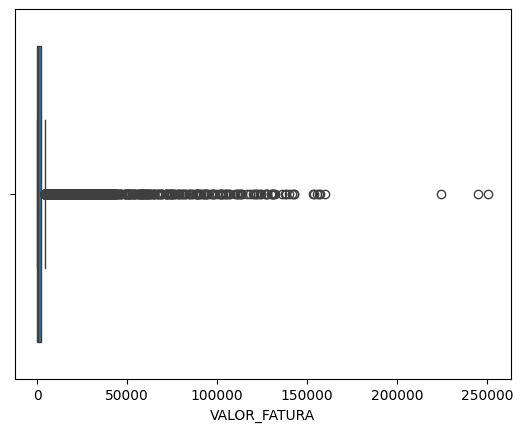

In [27]:
# Gráfico para analize de outliers da variável "VALOR_FATURA"
sns.boxplot(x=df["VALOR_FATURA"]);

In [28]:
# Visualização dos registros com outliers da variável "VALOR_FATURA"
df[(df["VALOR_FATURA"] > 200000)]

,MATRICULA,VALOR_FATURA,VOLUME_FATURA_AGUA,VOLUME_FATURA_ESGOTO,VOLUME_MEDIDO_AGUA,VOLUME_MEDIDO_ESGOTO,NOME_CLIENTE,HIDROMETRO,DATA_VENCIMENTO,TIPO_LOGRADOURO,NOME_LOGRADOURO,NUM_IMOVEL,COMPLEMENTO,INFO_COMPLEMENTO,BAIRRO
37340,11193247,224754.01,8682,8682,8682,8682,PREF M BELO HORIZONTE SEC EDUCACAO,D17B 0704725 ...,23/9/2023,R,CARANGOLA,288,,,SANTO ANTONIO
46877,17449367,250856.23,9501,9501,9501,9501,PREF M BELO HORIZONTE RESTAURANTE,E17B 0791119 ...,20/2/2024,AV,DO CONTORNO,11484,,,CENTRO
48843,105368342,244909.48,8690,8690,8690,8690,PREF M BELO HORIZONTE BHTRANS,D18B 7021300 ...,17/3/2024,AV,CRISTIANO MACHADO,5600,,,SAO PAULO


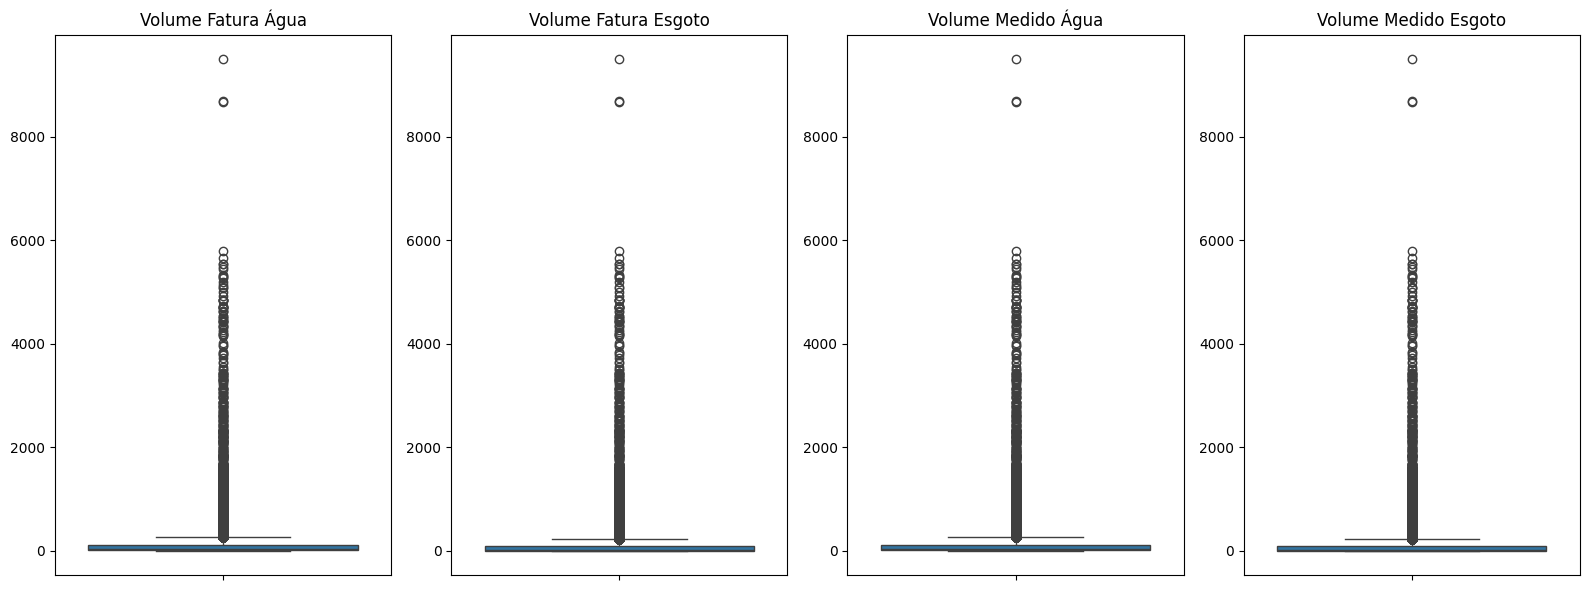

In [29]:
# Configuração dos subplots de gráficos para analize de outliers das variáveis de volume
fig, axes = plt.subplots(1, 4, figsize=(16, 6))  # 1 linha, 4 colunas, tamanho ajustável

# Geração de boxplots para cada coluna
sns.boxplot(y=df["VOLUME_FATURA_AGUA"], ax=axes[0])
axes[0].set_title("Volume Fatura Água")
axes[0].set_ylabel("")

sns.boxplot(y=df["VOLUME_FATURA_ESGOTO"], ax=axes[1])
axes[1].set_title("Volume Fatura Esgoto")
axes[1].set_ylabel("")

sns.boxplot(y=df["VOLUME_MEDIDO_AGUA"], ax=axes[2])
axes[2].set_title("Volume Medido Água")
axes[2].set_ylabel("")

sns.boxplot(y=df["VOLUME_MEDIDO_ESGOTO"], ax=axes[3])
axes[3].set_title("Volume Medido Esgoto")
axes[3].set_ylabel("")

# Ajuste do layout para não sobrepor textos
plt.tight_layout()
plt.show()

In [30]:
# Visualização dos registros com outliers de uma das variáveis de volume
df[(df["VOLUME_FATURA_AGUA"] > 8000)]

,MATRICULA,VALOR_FATURA,VOLUME_FATURA_AGUA,VOLUME_FATURA_ESGOTO,VOLUME_MEDIDO_AGUA,VOLUME_MEDIDO_ESGOTO,NOME_CLIENTE,HIDROMETRO,DATA_VENCIMENTO,TIPO_LOGRADOURO,NOME_LOGRADOURO,NUM_IMOVEL,COMPLEMENTO,INFO_COMPLEMENTO,BAIRRO
37340,11193247,224754.01,8682,8682,8682,8682,PREF M BELO HORIZONTE SEC EDUCACAO,D17B 0704725 ...,23/9/2023,R,CARANGOLA,288,,,SANTO ANTONIO
46877,17449367,250856.23,9501,9501,9501,9501,PREF M BELO HORIZONTE RESTAURANTE,E17B 0791119 ...,20/2/2024,AV,DO CONTORNO,11484,,,CENTRO
48843,105368342,244909.48,8690,8690,8690,8690,PREF M BELO HORIZONTE BHTRANS,D18B 7021300 ...,17/3/2024,AV,CRISTIANO MACHADO,5600,,,SAO PAULO


In [31]:
# Converter data para datetime
df["DATA_VENCIMENTO"] = pd.to_datetime(df["DATA_VENCIMENTO"], format='mixed', dayfirst=True)

In [32]:
# Visualização de dados da coluna "BAIRRO"
df["BAIRRO"].unique()[:4]

array(['PADRE EUSTAQUIO               ', 'CARLOS PRATES                 ',
       'FLORAMAR                      ', 'TUPI A                        '],
      dtype=object)

In [33]:
# Retirada dos espaçamentos nas strings
df["BAIRRO"]= df["BAIRRO"].str.strip()

# Visualização do resultado
print(f"{df['BAIRRO'].unique()[:4]} \nTotal de bairros: {df['BAIRRO'].nunique()}")

['PADRE EUSTAQUIO' 'CARLOS PRATES' 'FLORAMAR' 'TUPI A'] 
Total de bairros: 343


In [34]:
# Separação das colunas que serão utilizadas
columns= ["MATRICULA", "VALOR_FATURA", "VOLUME_FATURA_AGUA", "VOLUME_FATURA_ESGOTO",\
          "VOLUME_MEDIDO_AGUA", "VOLUME_MEDIDO_ESGOTO", "DATA_VENCIMENTO", "BAIRRO"]
df= df[columns]

In [35]:
# Visualização dos dados tratados
display(df.head(3))
df.info()

,MATRICULA,VALOR_FATURA,VOLUME_FATURA_AGUA,VOLUME_FATURA_ESGOTO,VOLUME_MEDIDO_AGUA,VOLUME_MEDIDO_ESGOTO,DATA_VENCIMENTO,BAIRRO
0,115001999,24.24,0,0,0,0,2022-02-15,PADRE EUSTAQUIO
1,126981035,24.24,0,0,0,0,2022-02-15,CARLOS PRATES
2,23084286,74.82,5,5,5,5,2022-02-15,PADRE EUSTAQUIO


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67646 entries, 0 to 67645
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MATRICULA             67646 non-null  int64         
 1   VALOR_FATURA          67646 non-null  float64       
 2   VOLUME_FATURA_AGUA    67646 non-null  int64         
 3   VOLUME_FATURA_ESGOTO  67646 non-null  int64         
 4   VOLUME_MEDIDO_AGUA    67646 non-null  int64         
 5   VOLUME_MEDIDO_ESGOTO  67646 non-null  int64         
 6   DATA_VENCIMENTO       67646 non-null  datetime64[ns]
 7   BAIRRO                67646 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [36]:
# Exportação do arquivo processado
df.to_csv("../../data/processed/processed_water.csv", index=False, encoding="utf-8")

In [37]:
print("Volume  medido Esgoto:",  df['VOLUME_MEDIDO_ESGOTO'].value_counts)
print("Volume  medido Agua:", df['VOLUME_MEDIDO_AGUA'].value_counts)



Volume  medido Esgoto: <bound method IndexOpsMixin.value_counts of 0         0
1         0
2         5
3         0
4        85
         ..
67641     0
67642     0
67643     0
67644     0
67645     0
Name: VOLUME_MEDIDO_ESGOTO, Length: 67646, dtype: int64>
Volume  medido Agua: <bound method IndexOpsMixin.value_counts of 0         0
1         0
2         5
3         0
4        85
         ..
67641     0
67642     0
67643     0
67644     0
67645     0
Name: VOLUME_MEDIDO_AGUA, Length: 67646, dtype: int64>


In [40]:
df2 = df[df['DATA_VENCIMENTO'] != '2024-12-25']

In [44]:
df.head(10)

,MATRICULA,VALOR_FATURA,VOLUME_FATURA_AGUA,VOLUME_FATURA_ESGOTO,VOLUME_MEDIDO_AGUA,VOLUME_MEDIDO_ESGOTO,DATA_VENCIMENTO,BAIRRO
0,115001999,24.24,0,0,0,0,2022-02-15,PADRE EUSTAQUIO
1,126981035,24.24,0,0,0,0,2022-02-15,CARLOS PRATES
2,23084286,74.82,5,5,5,5,2022-02-15,PADRE EUSTAQUIO
3,790397,24.24,0,0,0,0,2022-02-15,PADRE EUSTAQUIO
4,162890796,1490.10,85,85,85,85,2022-02-15,CARLOS PRATES
5,158626435,24.28,0,0,0,0,2022-02-15,PADRE EUSTAQUIO
6,113334303,770.54,49,49,49,49,2022-02-15,FLORAMAR
7,2855143,951.04,58,58,58,58,2022-02-15,TUPI A
8,2840715,7765.66,368,368,368,368,2022-02-15,FLORAMAR
9,133232778,86.30,12,0,12,0,2022-02-15,PLANALTO


In [42]:
# Exportação do arquivo processado
df2.to_csv("../../data/processed/processed_test.csv", index=False, encoding="utf-8")